In [5]:
import pandas as pd
#import apriori from mlxtend.frequent_patterns
#import association_rules from mlxtend.frequent_patterns 
from matplotlib import pyplot as plt

df_real = pd.read_excel('C:\\OnlineRetail.xlsx',encoding = 'ISO-8859-1')

In [6]:
df_real.head()

## CLEANING AND FORMATTING DATA

#Re-ordering the coloumns and creating new dataframe as df

df = df_real[['StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country','InvoiceNo']]

df.head()

df.info()

# check missing values for each column 

df.isnull().sum().sort_values(ascending=False)

# finding empty values in rows(axis defines row)

df[df.isnull().any(axis=1)].head()

# here we drop null values from df

df = df.dropna()

# customer id has floating values; convert them to string

df['CustomerID'] = df['CustomerID'].astype('int64')
df = df[df.Quantity > 0]

#Removing empty invoice number rows

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

#Removing credit transactions(invoice number starts with C)

df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

# Adding year feature to the dataset 

df['year'] = df['InvoiceDate'].dt.year

#Adding month and its name

df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour

df.head()


#df['monthname'] = df['InvoiceDate'].dt.month_name()
#del df['monthname']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    541909 non-null  object        
 1   Description  540455 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      541909 non-null  object        
 7   InvoiceNo    541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,year,month,day,hour
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,536365,2010,12,1,8
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,2010,12,1,8
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,536365,2010,12,1,8
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,2010,12,1,8
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,2010,12,1,8


## DATA ANALYSIS

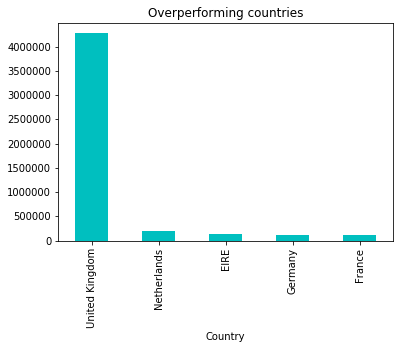

In [3]:
#Adding a Column name with total to calculate prices.

Total = df['Quantity'] * df['UnitPrice']
df.insert(loc=7,column='Total',value=Total)

df = df[['CustomerID','Quantity','Description','UnitPrice','Total','InvoiceDate','Country','InvoiceNo','StockCode','month','year','day','hour']]

df.head()

### Countries sorted by quantities

#Countries sorted by quantities

salesort = df.groupby(['Country'])['Quantity'].sum().sort_values(ascending = False)
salesort

#salesort.plot(kind = 'bar', title = 'Quantities of countries')

### Top 5 countries

salesort[:5].plot(kind = 'bar', title = 'Overperforming countries', color='c')

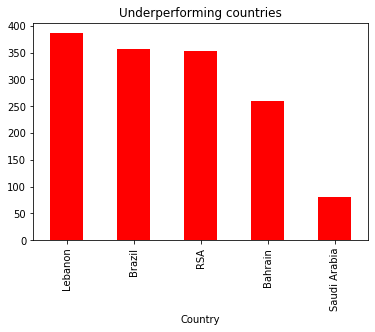

In [7]:
### Bottom 5 countries

salesort[32:].plot(kind = 'bar', title = 'Underperforming countries', color='red')

In [8]:
### Analysis on number of orders

###### Number of orders by each customer (used customer id and invoice number)
orders = df.groupby(['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders.head()


,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


In [9]:
orders.sort_values('InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


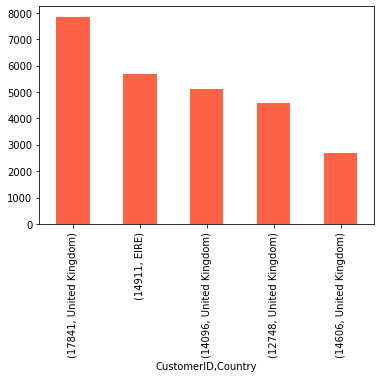

In [10]:
### Top 5 customers with highest orders

df.groupby(['CustomerID','Country'])['InvoiceNo'].count().sort_values(ascending = False).head().plot(kind = 'bar', color='tomato')


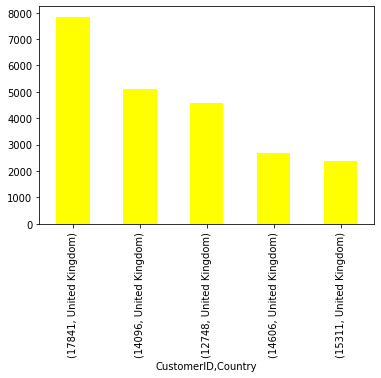

In [11]:
#Top customers with highest orders in UK

df[df['Country'] == "United Kingdom"].groupby(['CustomerID','Country'])['InvoiceNo'].count().sort_values(ascending = False).head().plot(kind = 'bar', color='yellow')


In [12]:
### Money spent by various customers

Amount = df.groupby(['CustomerID','Country'], as_index=False)['Total'].sum()

### Top 5 customers who spent the most

Amount.sort_values('Total', ascending=False).head()



,CustomerID,Country,Total
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


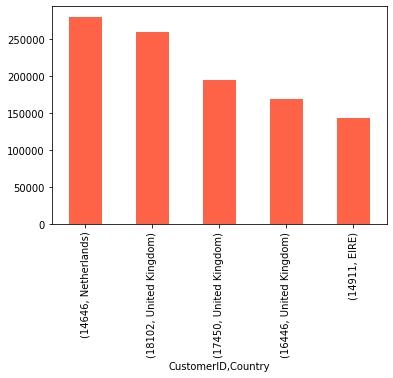

In [13]:
df.groupby(['CustomerID','Country'])['Total'].sum().sort_values(ascending = False).head().plot(kind = 'bar', color='tomato')


Text(0, 0.5, 'Quantity')

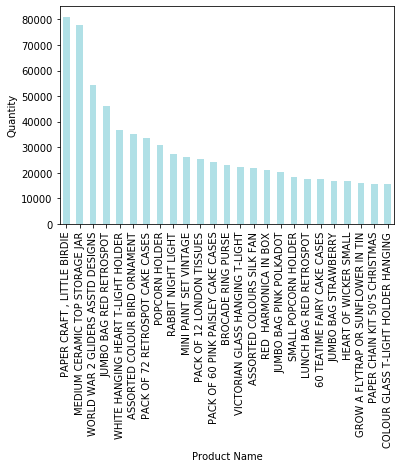

In [14]:
### Top 25 Most sold products by Quantity

most_sold = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending = False)
top25 = most_sold[0:25].plot(kind = 'bar', color='powderblue')
top25.set_xlabel("Product Name")
top25.set_ylabel("Quantity")

## DIVE DEEPER


Text(0.5, 1.0, 'Monthly Sales')

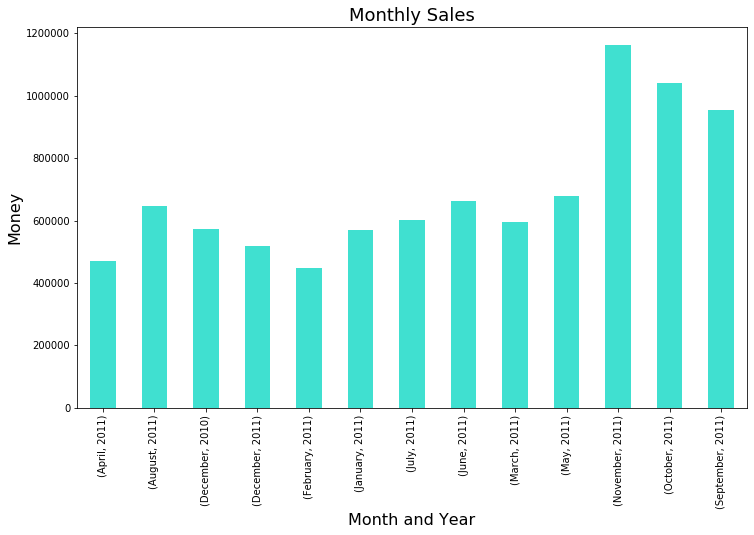

In [12]:
### Monthly sales Analysis

df['monthname'] = df['InvoiceDate'].dt.month_name()

monthly = df.groupby(['monthname','year'])['Total'].sum().plot(kind = 'bar', color = 'turquoise', figsize=(12,7))
monthly.set_xlabel("Month and Year",size=16)
monthly.set_ylabel("Money",size=16)
monthly.set_title("Monthly Sales",size=18)

In [13]:
df.groupby(['monthname','year'])['Total'].sum()

monthname  year
April      2011     469200.361
August     2011     645343.900
December   2010     572713.890
           2011     518192.790
February   2011     447137.350
January    2011     569445.040
July       2011     600091.011
June       2011     661213.690
March      2011     595500.760
May        2011     678594.560
November   2011    1161817.380
October    2011    1039318.790
September  2011     952838.382
Name: Total, dtype: float64

Text(0.5, 1.0, 'Daily Sales')

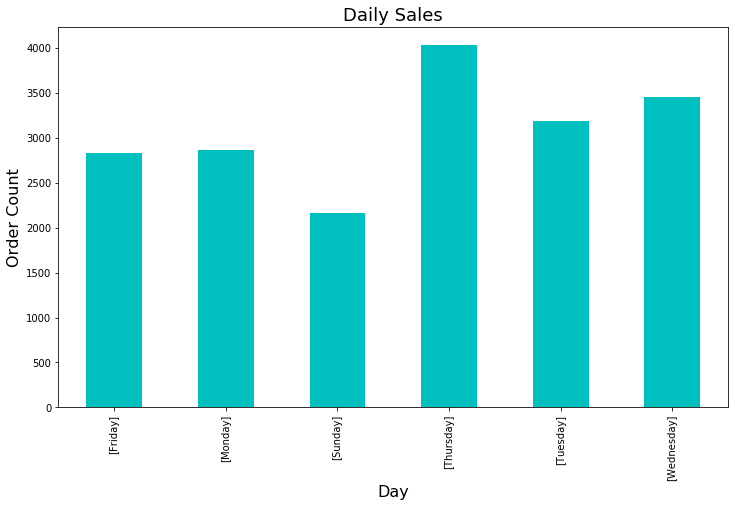

In [14]:
### Sales for Each day

#Added day name attribute to dataframe

df['dayname'] = df['InvoiceDate'].dt.day_name()

daily = df.groupby('InvoiceNo')['dayname'].unique().value_counts().sort_index().plot(kind = 'bar',color = 'c', figsize=(12,7))
daily.set_xlabel("Day",size=16)
daily.set_ylabel("Order Count",size=16)
daily.set_title("Daily Sales",size=18)

In [34]:
df.groupby('InvoiceNo')['dayname'].unique().value_counts().sum()

18536

In [39]:
len(df.InvoiceNo.unique())

18536

In [40]:
df.groupby('InvoiceNo')['dayname'].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[Thursday]     4033
[Wednesday]    3455
[Tuesday]      3185
[Monday]       2863
[Friday]       2831
[Sunday]       2169
Name: dayname, dtype: int64

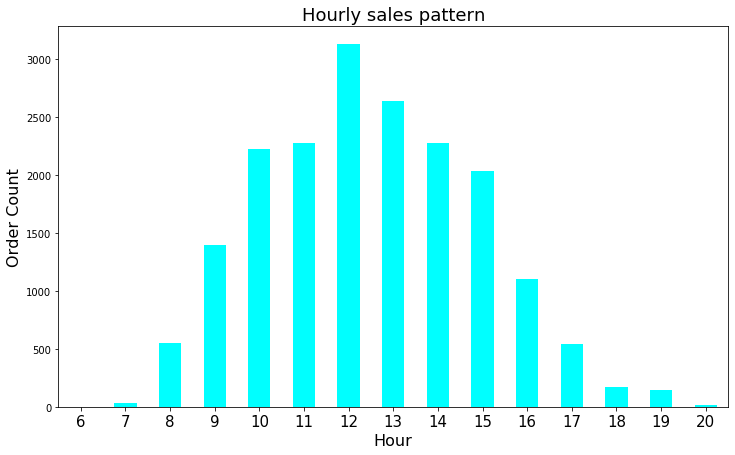

In [17]:
### Orders Each Hour

hourly = df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',color = 'aqua', figsize=(12,7))
hourly.set_xlabel("Hour",size=16)
hourly.set_ylabel("Order Count",size=16)
hourly.set_title("Hourly sales pattern",size=18)
hourly.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

In [43]:
#df.groupby('InvoiceNo')['hour'].unique().value_counts().sort_values(ascending = False)

C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


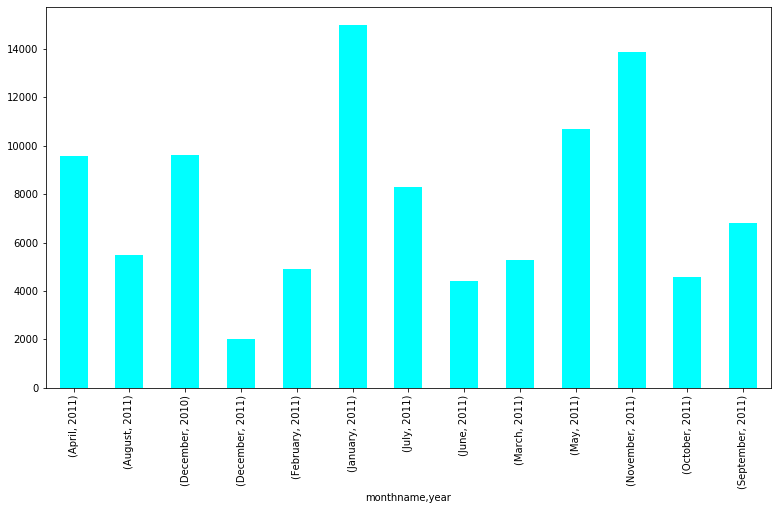

In [18]:
### Checking sales of a specific product over the year

df[df['Description'] == "WHITE HANGING HEART T-LIGHT HOLDER"].groupby(['monthname','year'])['Total'].sum().plot(kind = 'bar',color = 'gold', figsize=(13,7))


#Check how the prices of a product has varied over an year of time

r = df[df['Description'] == "RABBIT NIGHT LIGHT"].groupby(['monthname'])['UnitPrice'].unique()
r


#Countries with more number of customers

df.groupby(['Country'])['CustomerID'].count().sort_values(ascending = False).head()


#Finding average sales based on Stock code

df.groupby(['Description'])['Quantity','Total'].mean().sort_values(by = 'Quantity',ascending = False)


#Finding average sales by countries

df.groupby(['Country','Description'])['Quantity','Total'].mean().sort_values(by = 'Quantity',ascending = False)


#Most sold products are given below

most_sold = df[df['Country'] == "United Kingdom"].groupby(['Description'])['Quantity'].sum().sort_values(ascending = False)


#Check the sales of a specific product over diff months

df[df['Description'] == "WHITE HANGING HEART T-LIGHT HOLDER"].groupby(['monthname','year'])['Total'].sum().plot(kind = 'bar',color = 'aqua', figsize=(13,7))

In [19]:
#To check most frequent

af  = pd.read_excel('C:\\Newbook.xlsx',header=None) #newbook has top 25 most sold products
af.columns = ['A']
af['A'] = af['A'].str.strip()
DBS = list(af.A)
len(DBS)


max=len(DBS)

for i in range(0,max):
     print(df[df['Description'] == DBS[i]].groupby(['Country'])['Quantity','InvoiceNo'].sum().sort_values(by = 'Quantity',ascending = False))

C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


                Quantity
Country                 
United Kingdom     80995
                Quantity
Country                 
United Kingdom     76919
EIRE                 480
Australia            193
Norway               108
Netherlands           96
Switzerland           48
Germany               24
Poland                24
Israel                12
USA                   12
Empty DataFrame
Columns: [Quantity]
Index: []


C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


                 Quantity
Country                  
United Kingdom      41981
Netherlands          2000
Germany               522
France                440
Channel Islands       250
Australia             211
EIRE                  136
Portugal              120
Switzerland           110
Belgium               110
Norway                100
Finland                70
Spain                  41
Singapore              30
Austria                10
Italy                  10
RSA                    10
Sweden                 10
Cyprus                 10
USA                    10
                 Quantity
Country                  
United Kingdom      34648
EIRE                 1024
Netherlands           452
Cyprus                144
Channel Islands       108
Switzerland            68
Spain                  60
Italy                  54
Singapore              50
France                 49
Finland                24
Portugal               18
Germany                12
Australia               6
Malta       

C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


Empty DataFrame
Columns: [Quantity]
Index: []
Empty DataFrame
Columns: [Quantity]
Index: []
                 Quantity
Country                  
United Kingdom      21905
EIRE                  138
Germany               114
Netherlands            96
France                 60
Spain                  48
Channel Islands        24
Italy                  12
Poland                 12
Norway                  6
Portugal                6
RSA                     6
Switzerland             6
                Quantity
Country                 
United Kingdom     22711
Germany              180
Austria               36
Switzerland           36
                Quantity
Country                 
United Kingdom     19116
Germany             1164
Sweden               804
Australia            600
France                60
EIRE                  48
Norway                48
Denmark               12
Italy                 12
Netherlands           12


C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to 

Empty DataFrame
Columns: [Quantity]
Index: []
                 Quantity
Country                  
United Kingdom      18092
France                640
Netherlands           630
Germany               243
Channel Islands       200
Australia             100
EIRE                   60
Finland                60
Portugal               60
Spain                  30
Belgium                20
Singapore              20
Israel                 10
                 Quantity
Country                  
United Kingdom      16697
EIRE                  704
Singapore             200
France                192
Norway                144
Germany                99
Spain                  84
Channel Islands        60
Italy                  48
Netherlands            12
Switzerland            12
Empty DataFrame
Columns: [Quantity]
Index: []
                Quantity
Country                 
United Kingdom     16925
Australia           1704
France               588
EIRE                 510
Germany              348
Denma

C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]



                 Quantity
Country                  
United Kingdom      16361
EIRE                  196
Singapore              40
Poland                 36
Switzerland            36
Channel Islands        24
Finland                24
Spain                  18
Germany                12
Greece                 12
Portugal               12
France                  4
                 Quantity
Country                  
United Kingdom      13996
EIRE                  403
Australia             265
Japan                 170
France                126
Switzerland            86
Netherlands            50
Channel Islands        40
Spain                  38
Germany                34
Lebanon                15
Finland                12
Norway                 12
Denmark                12
Austria                 8
Belgium                 8
Singapore               8
Cyprus                  7
RSA                     4
Israel                  1
                 Quantity
Country                  
United King

C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


                Quantity
Country                 
United Kingdom      6954
Netherlands         1002
Germany              343
France               180
Belgium              170
EIRE                 130
Portugal             130
Spain                 26
Israel                20
Finland               10
Italy                 10
                Quantity
Country                 
United Kingdom     14787
Netherlands          288
EIRE                 224
Switzerland           96
Cyprus                64
Spain                 56
Czech Republic        48
Germany               32
Canada                16
                Quantity
Country                 
United Kingdom     11765
Netherlands         4801
France              4000
Japan               3408
Australia           1884
Germany              468
Belgium              186
Finland              156
Sweden               108
Iceland               84
Italy                 72
Portugal              66
EIRE                  54
Denmark               48


C:\Users\Preetham\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


In [20]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

Text(0.5, 1.0, 'Monthly Sales for UK')

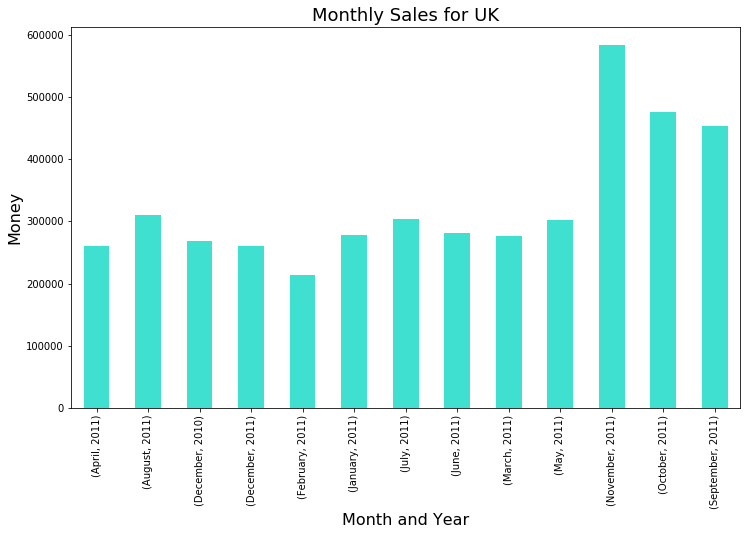

In [21]:
### Monthly sales Analysis for UK

df['monthname'] = df['InvoiceDate'].dt.month_name()

monthly1 = df[df['Country'] == 'United Kingdom'].groupby(['monthname','year'])['Quantity'].sum().plot(kind = 'bar', color = 'turquoise', figsize=(12,7))
monthly1.set_xlabel("Month and Year",size=16)
monthly1.set_ylabel("Money",size=16)
monthly1.set_title("Monthly Sales for UK",size=18)

In [22]:
#Quantities of top brought products during peak months

df[(df['Country'] == 'United Kingdom') & (df['month'] == 11) & (df['year'] == 2011)].groupby(['Description','monthname'])['Quantity'].sum().sort_values(ascending = False).head()

Description                     monthname
ASSTD DESIGN 3D PAPER STICKERS  November     12551
POPCORN HOLDER                  November      8036
RABBIT NIGHT LIGHT              November      6179
PAPER CHAIN KIT 50'S CHRISTMAS  November      5644
JUMBO BAG RED RETROSPOT         November      5341
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Monthly Sales for Netherlands')

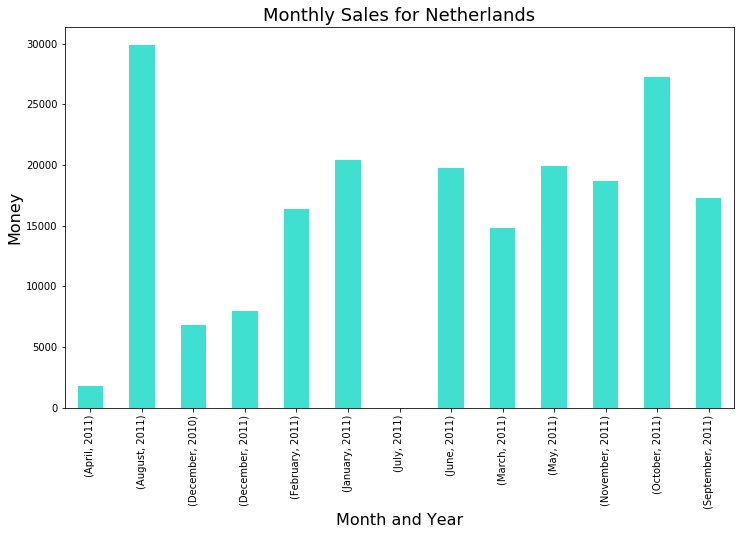

In [23]:
### Monthly sales Analysis for Netherlands

monthly2 = df[df['Country'] == 'Netherlands'].groupby(['monthname','year'])['Quantity'].sum().plot(kind = 'bar', color = 'turquoise', figsize=(12,7))
monthly2.set_xlabel("Month and Year",size=16)
monthly2.set_ylabel("Money",size=16)
monthly2.set_title("Monthly Sales for Netherlands",size=18)

In [24]:
df[(df['Country'] == 'Netherlands') & (df['month'] == 8) & (df['year'] == 2011)].groupby(['Description','monthname'])['Quantity'].sum().sort_values(ascending = False).head()

Description                          monthname
SPACEBOY LUNCH BOX                   August       896
DOLLY GIRL LUNCH BOX                 August       832
SET OF 2 CERAMIC CHRISTMAS REINDEER  August       768
ROUND SNACK BOXES SET OF4 WOODLAND   August       528
SET OF 60 PANTRY DESIGN CAKE CASES   August       480
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Monthly Sales for Ireland')

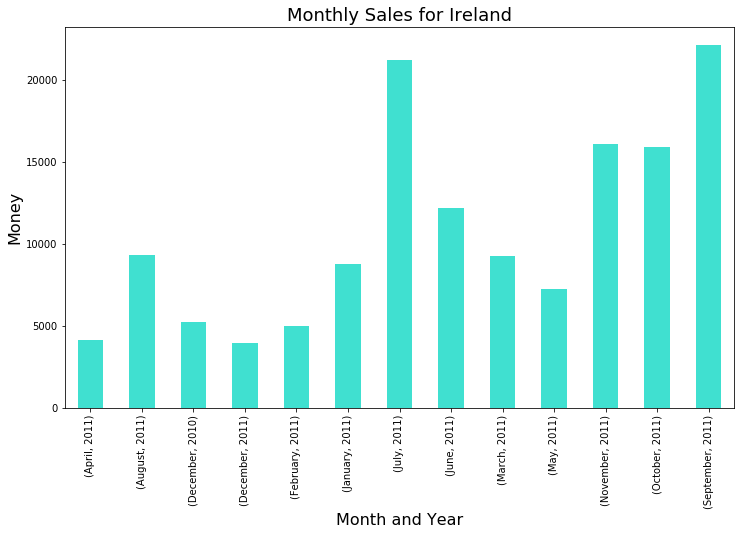

In [25]:
### Monthly sales Analysis for Ireland

monthly3 = df[df['Country'] == 'EIRE'].groupby(['monthname','year'])['Quantity'].sum().plot(kind = 'bar', color = 'turquoise', figsize=(12,7))
monthly3.set_xlabel("Month and Year",size=16)
monthly3.set_ylabel("Money",size=16)
monthly3.set_title("Monthly Sales for Ireland",size=18)

In [26]:
df[(df['Country'] == 'EIRE') & (df['month'] == 9) & (df['year'] == 2011)].groupby(['Description','monthname'])['Quantity'].sum().sort_values(ascending = False).head()

Description                      monthname
ASSORTED FLOWER COLOUR "LEIS"    September    960
60 CAKE CASES VINTAGE CHRISTMAS  September    480
36 DOILIES VINTAGE CHRISTMAS     September    444
COOK WITH WINE METAL SIGN        September    432
BEWARE OF THE CAT METAL SIGN     September    384
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Monthly Sales for Germany')

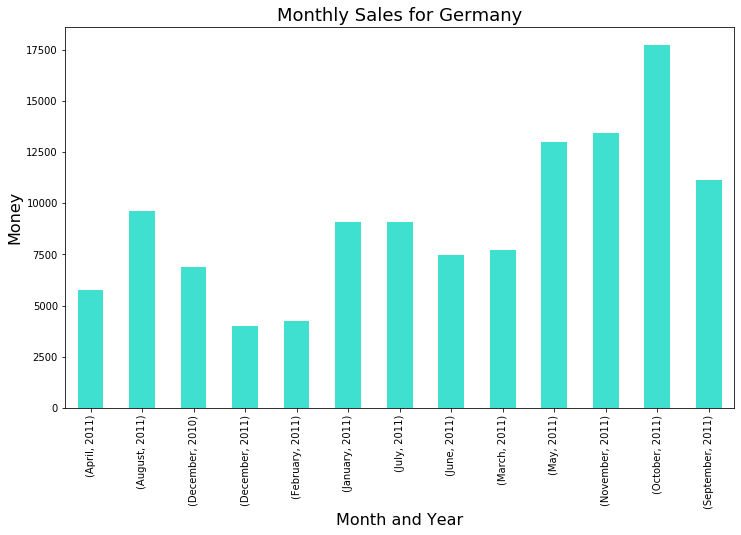

In [27]:
### Monthly sales Analysis for Germany

monthly3 = df[df['Country'] == 'Germany'].groupby(['monthname','year'])['Quantity'].sum().plot(kind = 'bar', color = 'turquoise', figsize=(12,7))
monthly3.set_xlabel("Month and Year",size=16)
monthly3.set_ylabel("Money",size=16)
monthly3.set_title("Monthly Sales for Germany",size=18)

In [28]:
df[(df['Country'] == 'Germany') & (df['month'] == 10) & (df['year'] == 2011)].groupby(['Description','monthname'])['Quantity'].sum().sort_values(ascending = False).head()

Description                       monthname
POPART WOODEN PENCILS ASST        October      600
PACK OF 12 RED APPLE TISSUES      October      456
WHITE ROCKING HORSE HAND PAINTED  October      168
STAR WREATH DECORATION WITH BELL  October      156
6 RIBBONS RUSTIC CHARM            October      156
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Monthly Sales for France')

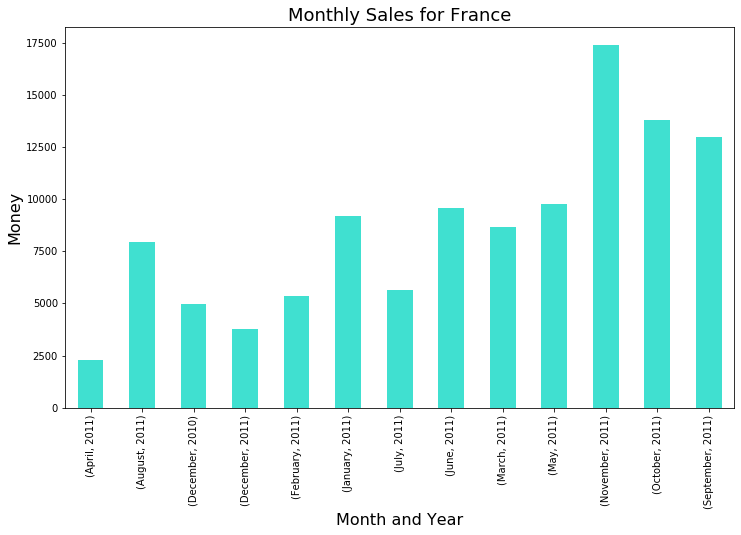

In [29]:
### Monthly sales Analysis for France

monthly3 = df[df['Country'] == 'France'].groupby(['monthname','year'])['Quantity'].sum().plot(kind = 'bar', color = 'turquoise', figsize=(12,7))
monthly3.set_xlabel("Month and Year",size=16)
monthly3.set_ylabel("Money",size=16)
monthly3.set_title("Monthly Sales for France",size=18)

In [30]:
df[(df['Country'] == 'France') & (df['month'] == 11) & (df['year'] == 2011)].groupby(['Description','monthname'])['Quantity'].sum().sort_values(ascending = False).head()

Description                    monthname
RABBIT NIGHT LIGHT             November     1510
WRAP CHRISTMAS VILLAGE         November      525
MINI PAINT SET VINTAGE         November      360
RED TOADSTOOL LED NIGHT LIGHT  November      271
ASSORTED COLOUR BIRD ORNAMENT  November      224
Name: Quantity, dtype: int64

In [19]:
df.groupby(['Country'])['InvoiceNo'].count().sort_values(ascending = False )[:5]

Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: InvoiceNo, dtype: int64